# **PyTorch Workflow Fundamentals**

Let's explore a an example PyTorch end-to-end workflow.

Resources:

  - Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

  - Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

  - Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making predictions and evaluting a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}

In [ ]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.3.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything...in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audion like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This where the data explorer's motto comes in!

"Visualize, Visualize, visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="testing data")

  # Are there predictions?
  if predictions is not None:
    # plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    # show the legend
  plt.legend(prop={"size": 14})

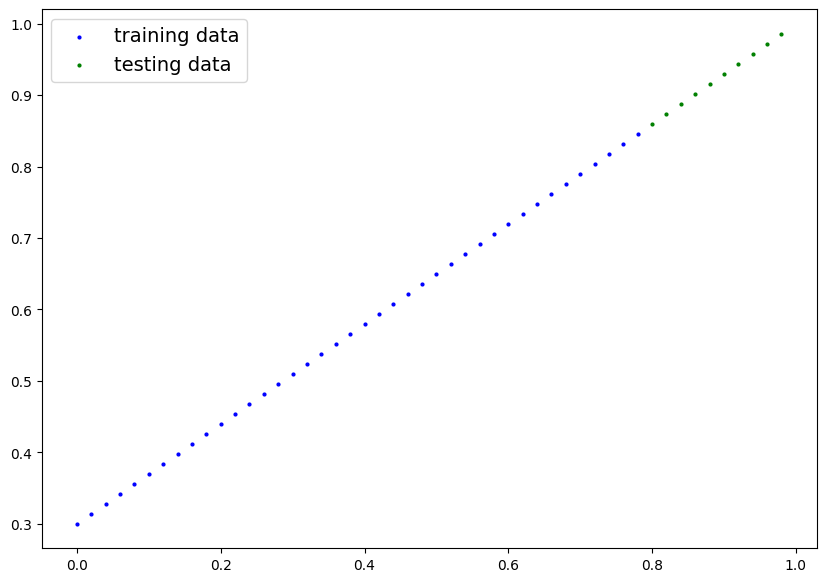

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model

This is very exciting...let's do it!

Because we're going to be building classes throughout the couse, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from Real Python : https://realpython.com/python3-object-oriented-programming/

nn.module documentations : https://pytorch.org/docs/stable/generated/torch.nn.Module.html

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias) values we used to create the data.

How does it do so?

Through two main algorithms
1. Gradient Descent
2. Backpropagation

In [ ]:
# create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <-almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, # <- can this parameter be updated via gradient descent?
                                            dtype = torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                          requires_grad = True, # <- can this parameter be updated via gradient descent?
                                          dtype = torch.float)) ## <- PyTorch loves the datatype torch.float32


  # forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs ( a neural network can be consisdered a computational graph)
* torch.nn.parameter -  What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

see more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the content of our PyTorch model.

Now we've created a model, let's see what's inside.

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data thorugh our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

see more on inference mode here : https://x.com/PyTorch/status/1437838231505096708?lang=en

In [ ]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# you can also do something similar with torch._grad(), however, torch.inference_mode() mode ins preferred
with torch.no_grad():
  y_preds =  model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

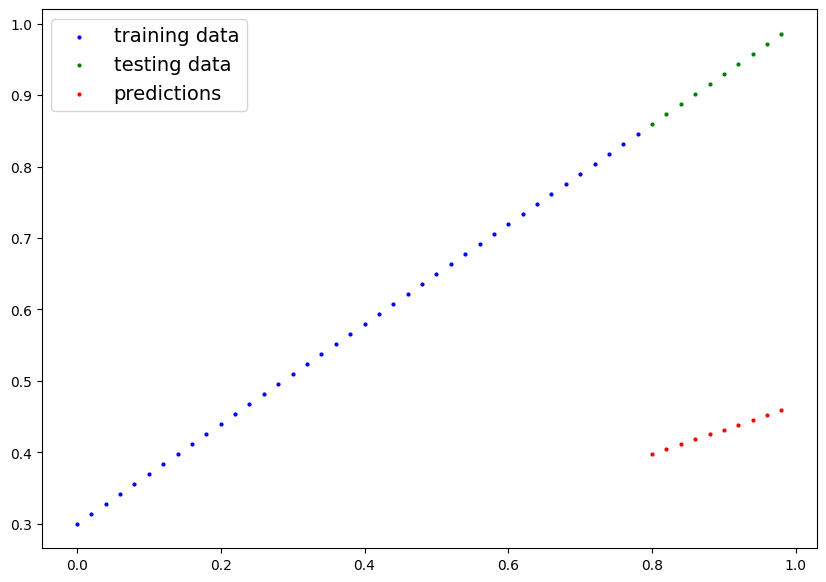

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to moce from some *unkown* parameters (these may be random) to some *known* parameters.

Or in other words form a poor representation of the dat to a better representation of the data.

One way to measure how poor or haow wrong your models predictions are is to use a loss function.

* Note: loss function may also be called cost functionor criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better. - https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the loss of model and adjusts the model's parameters (e.g. weight & bias in our case) ot improve the loss function. - https://pytorch.org/docs/stable/optim.html
  *  Inside the optimizer you'll often have to set two parameters:
    - params - the model parameters you'd like to optimize, for example params = model_0.parameter()
    - lr (Learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters
    with each step (a small lr result in small changes, a large lr result in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7ac7759cac70>

In [ ]:
# checkout our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup loss function
loss_fn =  nn.L1Loss()

# setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr = learning rate =  possible the most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

for example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.aptim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCEloss() (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward` function) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels.
3. Optimizer zero grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


# Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to requie=re gradients

  # 1. Forward pass

  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"loss : {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5.  step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so...we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  model_0.eval() #turn off gradient tracking (turns off different settings in the model not needed for evaluation/testing)

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code

  # 1. Do the forward pass
    test_pred_new = model_0(X_test)

  # 2. Calculate the loss
    test_loss = loss_fn(test_pred_new, y_test)

  # Print out what's happening
  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  # print out model state_dict
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

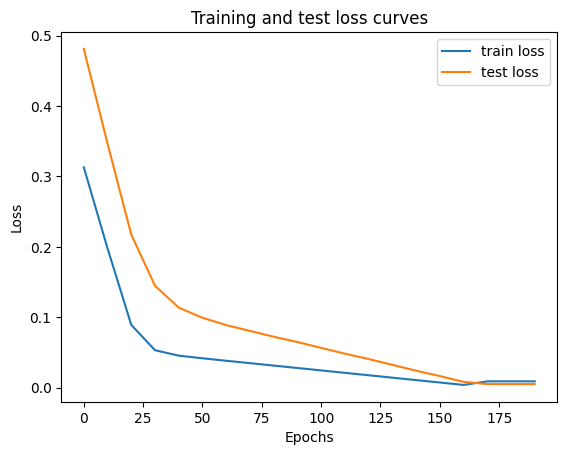

In [ ]:
# plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

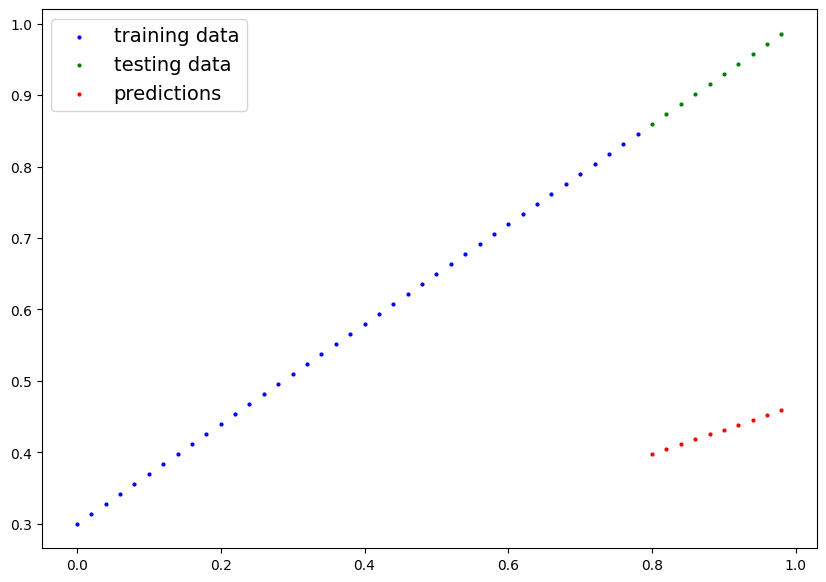

In [ ]:
# previous prediction
plot_predictions(predictions = y_preds)

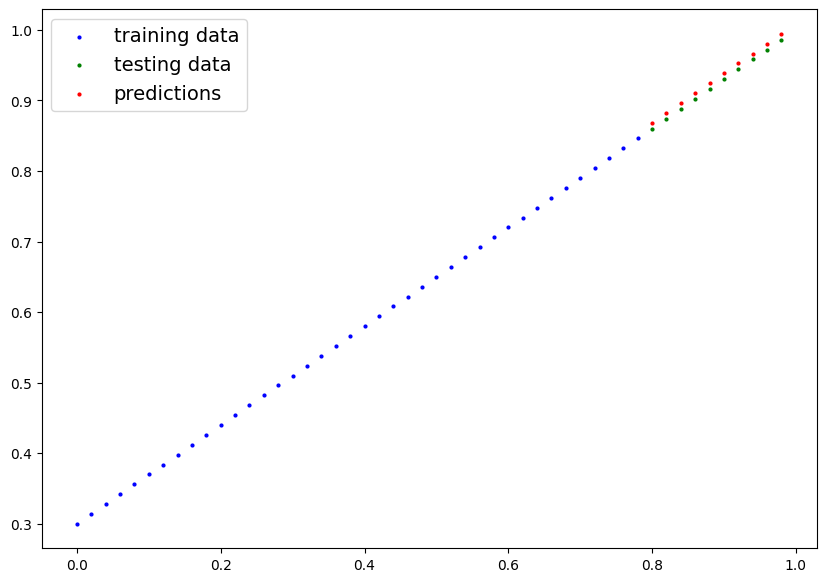

In [ ]:
# after 30 epochs prediction
plot_predictions (predictions = y_pred_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save & load code tutorial - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# saving our PyTorch model
from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#  2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)
#

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -lh models

total 4.0K
-rw-r--r-- 1 root root 1.7K Aug 25 18:55 01_pytorch_workflow_model.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [ ]:
#  Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.3.1+cu121'

create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Sun Aug 25 18:55:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              28W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueez, errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#  split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="testing data")

  # Are there predictions?
  if predictions is not None:
    # plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    # show the legend
  plt.legend(prop={"size": 14})

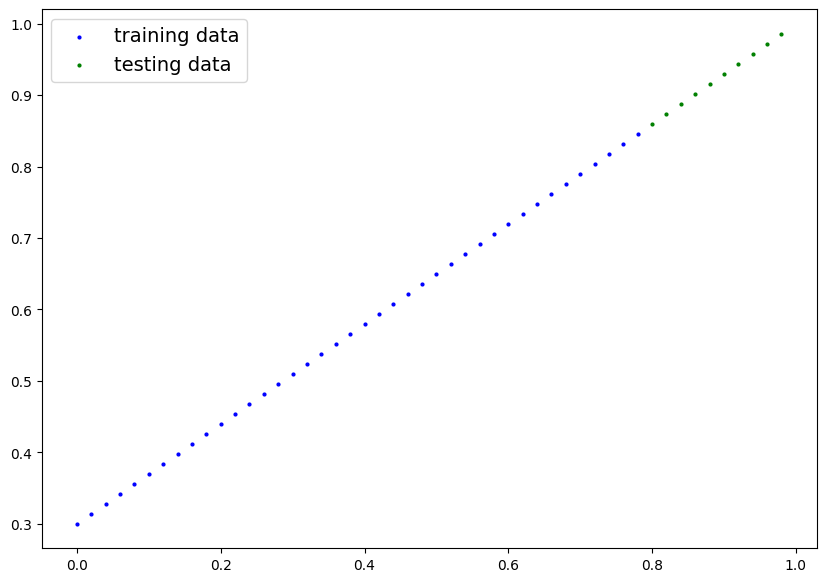

In [ ]:
# Plot the data
# Note: If you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)


## 6.2 Building a PyTorch linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called : linear transform , probing layer, fully connected layer , dense layer
    self.linear_layer = nn.Linear(in_features=1, # input (no. of input features)
                                  out_features=1) # output (no. of output features)

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Create an instance of the linear regression model v2 and send it to the target device
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup Loss function
loss_fn = nn.L1Loss()

# Setup Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.001)

In [ ]:
# Let's write a taining loop
torch.manual_seed(42)

epochs = 400

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5861001014709473
Epoch: 10 | Loss: 0.5436570644378662 | Test loss: 0.5726293921470642
Epoch: 20 | Loss: 0.5321362614631653 | Test loss: 0.5591585040092468
Epoch: 30 | Loss: 0.5206153988838196 | Test loss: 0.5456876754760742
Epoch: 40 | Loss: 0.5090945363044739 | Test loss: 0.5322169661521912
Epoch: 50 | Loss: 0.49757376313209534 | Test loss: 0.5187460780143738
Epoch: 60 | Loss: 0.48605284094810486 | Test loss: 0.5052752494812012
Epoch: 70 | Loss: 0.47453203797340393 | Test loss: 0.49180442094802856
Epoch: 80 | Loss: 0.4630111753940582 | Test loss: 0.4783336818218231
Epoch: 90 | Loss: 0.4514903724193573 | Test loss: 0.4648628234863281
Epoch: 100 | Loss: 0.4399694502353668 | Test loss: 0.4513919949531555
Epoch: 110 | Loss: 0.4284486472606659 | Test loss: 0.4379211962223053
Epoch: 120 | Loss: 0.4169278144836426 | Test loss: 0.4244503974914551
Epoch: 130 | Loss: 0.4054069519042969 | Test loss: 0.41097956895828247
Epoch: 140 | Loss: 0.39388

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6085]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4300], device='cuda:0'))])

## 6.4 Making and evaluating predictions

In [ ]:
#  Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.9168],
        [0.9290],
        [0.9412],
        [0.9534],
        [0.9655],
        [0.9777],
        [0.9899],
        [1.0020],
        [1.0142],
        [1.0264]], device='cuda:0')

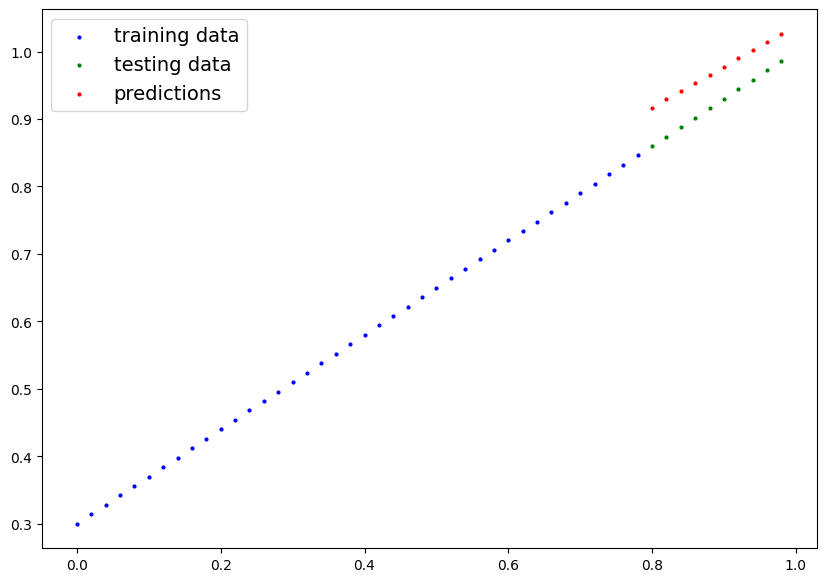

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions = y_preds.cpu())

## 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. Create model direactory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_v2.pth


In [ ]:
# Load a PyTorch


# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the state_dict of our saved model
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

# Evaluate the loaded model
# load_model_1.eval()

# # Make some predictions with the loaded model
# with torch.inference_mode():
#   load_model_preds = load_model_1(X_test)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6085]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4300], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()

# Make some predictions with the loaded model
with torch.inference_mode():
  load_model_preds = loaded_model_1(X_test)

y_preds == load_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')